# Advanced Statistical Inference
## Gaussian Process Regression

# 1 Aims
- To sample from a Gaussian process prior distribution.
- To implement Gaussian process inference for regression.
- To use the above to observe samples from a Gaussian process posterior distribution.
- To evaluate how different hyperparameter settings impact model quality.

In [56]:
from pprint import pprint
import numpy as np
import numpy.linalg as linalg
import matplotlib
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import scipy
%matplotlib inline

In [57]:
x = np.random.uniform(-20,80,200)

In [58]:
t = np.sin(np.exp(0.03 * x))

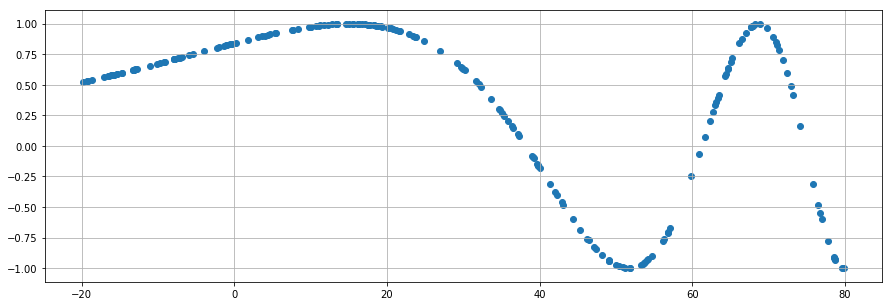

In [59]:
plt.figure(figsize=(15,5))
ax = plt.gca()
ax.scatter(x,t)
ax.grid()
plt.show()

## 3. Sampling from GP Prior

In [60]:
def compute_kernel(x1,x2,lengthscale,variance):
    return variance * np.exp(-(np.linalg.norm(x1 - x2)**2)/(2*lengthscale*lengthscale))

In [61]:
def compute_kernel_wrapper(x1,x2,lengthscale,variance,noise=0):
    K = np.array([[compute_kernel(x,y,lengthscale,variance) for x in x1] for y in x2])
    return K  if noise == 0 else K + noise * np.identity(len(K))

In [62]:
K = compute_kernel_wrapper(x,x,10,2)
mu = np.zeros_like(x)

In [63]:
r = np.random.multivariate_normal(mu,K,size=4)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


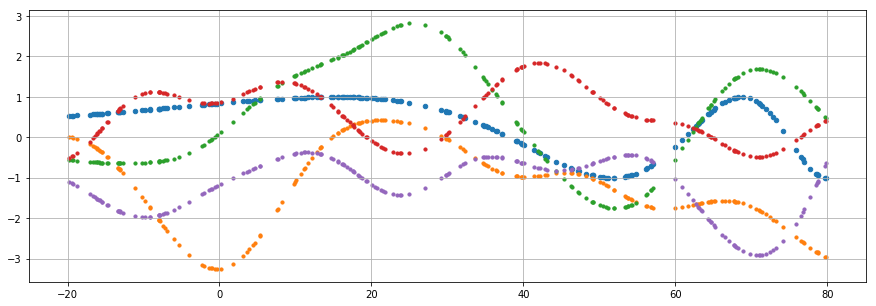

In [64]:
plt.figure(figsize=(15,5))
ax = plt.gca()
ax.scatter(x,t,s=20)
ax.scatter(x,r[0],s=10)
ax.scatter(x,r[1],s=10)
ax.scatter(x,r[2],s=10)
ax.scatter(x,r[3],s=10)
plt.grid()
plt.show()

## 4. GP Inference

In [65]:
def inv_prod(X,y):
    L = np.linalg.cholesky(X)
    B = scipy.linalg.solve_triangular(X,y,lower=True)
    return scipy.linalg.solve_triangular(X.T,B,lower=False)

In [66]:
def gp_inference(obs_x, obs_t, new_x, lengthscale,variance,noise):
    n = len(obs_x)
    kern_obs = compute_kernel_wrapper(obs_x,obs_x,lengthscale,variance,noise=10**(-6)) 
    #cholesky
    L = np.linalg.cholesky(kern_obs)
    B = scipy.linalg.solve_triangular(L,obs_t,lower=True)
    alpha = scipy.linalg.solve_triangular(L.T,B,lower=False)
    
    kern_obs_pred = compute_kernel_wrapper(obs_x,new_x,lengthscale,variance,noise)
    
    kern_pred = compute_kernel_wrapper(new_x, new_x,lengthscale,variance,noise)
    
    post_m = kern_obs_pred.dot(alpha)
        
    v = np.dot(kern_obs_pred,np.linalg.inv(L))
    
    post_v = kern_pred - np.dot(v,np.transpose(v))
    
    return post_m,post_v

In [67]:
obs_x = np.random.choice(x,20,replace=False,)
obs_t = np.sin(np.exp(0.03 * obs_x))
mu,v = gp_inference(obs_x,obs_t,x,10,2,0)

In [68]:
r = np.random.multivariate_normal(mu,v,size=50)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


## 5. Sampling from GP Posterior

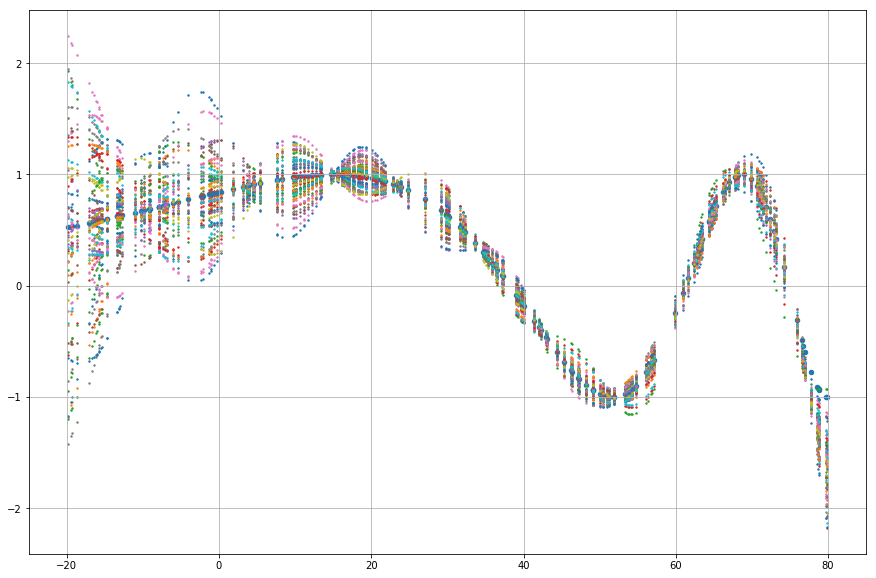

In [69]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.scatter(x,t,s=20)
for _ in r:
    ax.scatter(x,_,s=2)
plt.grid()
plt.show()

### Comment:
What we see here is that the model can approximate well many different functions similar to our own